In [ ]:
from torchvision import models
print(dir(models)) 

['AlexNet', 'AlexNet_Weights', 'ConvNeXt', 'ConvNeXt_Base_Weights', 'ConvNeXt_Large_Weights', 'ConvNeXt_Small_Weights', 'ConvNeXt_Tiny_Weights', 'DenseNet', 'DenseNet121_Weights', 'DenseNet161_Weights', 'DenseNet169_Weights', 'DenseNet201_Weights', 'EfficientNet', 'EfficientNet_B0_Weights', 'EfficientNet_B1_Weights', 'EfficientNet_B2_Weights', 'EfficientNet_B3_Weights', 'EfficientNet_B4_Weights', 'EfficientNet_B5_Weights', 'EfficientNet_B6_Weights', 'EfficientNet_B7_Weights', 'EfficientNet_V2_L_Weights', 'EfficientNet_V2_M_Weights', 'EfficientNet_V2_S_Weights', 'GoogLeNet', 'GoogLeNetOutputs', 'GoogLeNet_Weights', 'Inception3', 'InceptionOutputs', 'Inception_V3_Weights', 'MNASNet', 'MNASNet0_5_Weights', 'MNASNet0_75_Weights', 'MNASNet1_0_Weights', 'MNASNet1_3_Weights', 'MobileNetV2', 'MobileNetV3', 'MobileNet_V2_Weights', 'MobileNet_V3_Large_Weights', 'MobileNet_V3_Small_Weights', 'RegNet', 'RegNet_X_16GF_Weights', 'RegNet_X_1_6GF_Weights', 'RegNet_X_32GF_Weights', 'RegNet_X_3_2GF_Weig

In [ ]:
#download the pre-trained resnet 18 model  
resnet18 = models.resnet18(pretrained=True)
resnet18

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#change to the shared drive which contains the pictures
%cd /content/drive/MyDrive/IE643_Lecture18_AdvTrainingExample 

/content/drive/MyDrive/IE643_Lecture18_AdvTrainingExample


In [ ]:
#Consider a sample image (cat image from https://freepnglogos.com, dog image from unsplash.com)
from PIL import Image
#sample_img = Image.open("cat-sample.png").convert('RGB')
sample_img = Image.open("dog_img.jpg").convert('RGB')

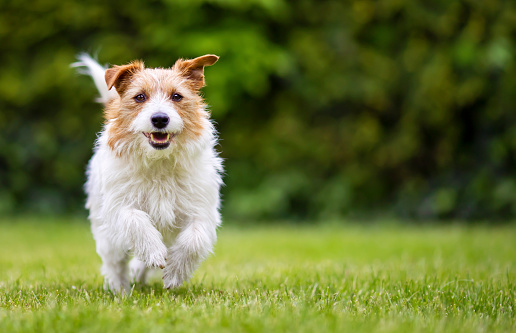

In [ ]:
sample_img

In [ ]:
#transforms useful for pre-processing
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
        mean=[0.485, 0.456, 0.406], #check why this mean is used
        std=[0.229, 0.224, 0.225] #check why this standard deviation is used
    )])


In [ ]:
#pre-process the image: resize, centercrop and normalize
sample_img_preprocess = preprocess(sample_img)


In [ ]:
#sample_img_preprocess

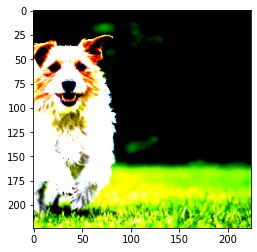

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(sample_img_preprocess.permute(1, 2, 0))

In [ ]:
#prepare the image tensor so that it is ready to be passed as input to resnet
import torch
batch_sample_img_tensor = torch.unsqueeze(sample_img_preprocess, 0)
batch_sample_img_tensor.shape

torch.Size([1, 3, 224, 224])

In [ ]:
#set up the resnet to evaluation mode
resnet18.eval()
# get output prediction of the sample image from resnet
output = resnet18(batch_sample_img_tensor)
#print(output)
print(torch.max(output))
print(torch.min(output))
#Note that the output is a vector of scores for 1000 classes used in imagenet

tensor(10.9336, grad_fn=<MaxBackward1>)
tensor(-6.0104, grad_fn=<MinBackward1>)


In [ ]:
#To find the actual class let us load the imagenet classes from a txt file
with open('imagenet_classes.txt') as f:
    class_names = [line.strip() for line in f.readlines()]

In [ ]:
#You can check class names by printing the information
#class_names

In [ ]:
#find the index of the class which achieves maximum score 
_, index = torch.max(output, 1)
index

tensor([263])

In [ ]:
confidence_scores = torch.nn.functional.softmax(output, dim=1)[0]
#print the class name of the predicted output and the confidence
print('class label:', class_names[index],'Confidence score:',confidence_scores[index].item())

class label: Pembroke, Pembroke Welsh corgi Confidence score: 0.1685982346534729


In [ ]:
#perturb the image tensor with some Gaussian noise
sample_img_preprocess.shape
#eps = 0.5*torch.randn(sample_img_preprocess.shape) #for cat image
eps = 0.1*torch.randn(sample_img_preprocess.shape) #for dog image
sample_img_noisy = sample_img_preprocess + eps

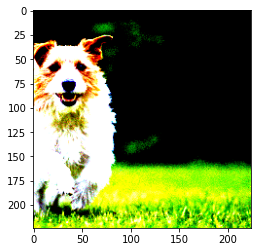

In [ ]:
plt.imshow(sample_img_noisy.permute(1,2,0))

In [ ]:
#Let us predict the class label for the noisy image using resnet18
#set up the resnet to evaluation mode
resnet18.eval()
# get output prediction of the sample image from resnet
batch_noisy_img_tensor = torch.unsqueeze(sample_img_noisy, 0)
output = resnet18(batch_noisy_img_tensor)
#find the index of the class which achieves maximum score 
_, index = torch.max(output, 1)

confidence_scores = torch.nn.functional.softmax(output, dim=1)[0]
#print the class name of the predicted output and the confidence
print('class label:', class_names[index],'Confidence score:',confidence_scores[index].item())

class label: wire-haired fox terrier Confidence score: 0.15096449851989746


#References 
1. https://vitalflux.com/pytorch-load-predict-pretrained-resnet-model/